# Task 4.2

I have found the location of the given poles and p1 are located on the real axis since e^(j*pi) = -1, therefore p2 needs a conjugate pole. The zeros needs to be the reciprocal of the poles which equals zero = 1/pole. When the poles and zeros are established I can compute the signals from them and plot its responses.


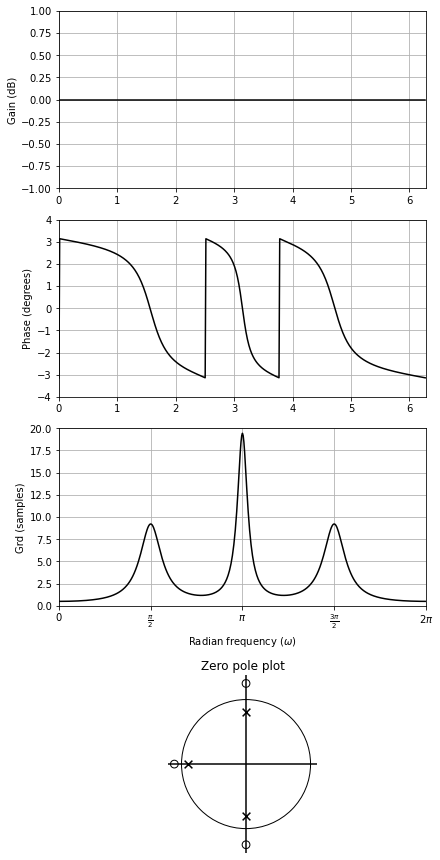

In [45]:
import numpy as np
import matplotlib.pyplot  as plt
import matplotlib.patches as mpatches
from scipy import signal

p1 = .9*np.exp(1j*np.pi)
p2 = .8*np.exp(1j*(np.pi/2)) 
p3 = np.conj(p2) # the conjugate pair to p2

P = np.array([p1, p2, p3])

z1 = 1/p1
z2 = 1/p2
z3 = 1/p3

Z = np.array([z1, z2, z3])

k = p1*p2*p3 # the gain of the signal

b, a = signal.zpk2tf(Z,P,k) # creating the signal

w, H = signal.freqz(b,a,worN=512,whole=True) # finding the frequency response of the signal

angleH = np.angle(H) # angle response

w, grdH = signal.group_delay((b,a),whole=True) # delay

fig1, axs = plt.subplots(4,1,figsize=(6,12),constrained_layout=True)
fig1.suptitle('')
axs[0].plot(w,20*np.log10(abs(H)),'k') # plotting amplitude response in dB
axs[0].set_ylabel('Gain (dB)')
axs[0].set_ylim([-1, 1])
axs[0].set_xlim([0,2*np.pi])
axs[0].grid(True)

axs[1].plot(w,angleH,'k')
axs[1].set_ylim([-4,4])
axs[1].set_xlim([0,2*np.pi])
axs[1].grid()
axs[1].set_ylabel('Phase (degrees)')

axs[2].plot(w,grdH,'k')
axs[2].set_ylabel('Grd (samples)')
axs[2].set_xlabel('Radian frequency '+ r'$(\omega)$')
axs[2].grid()
axs[2].set_ylim([0,20])
axs[2].set_xlim([0, 2*np.pi])
axs[2].set_xticks([0,np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
axs[2].set_xticklabels([0, r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$']);

axs[3].add_patch(mpatches.Circle((0, 0), radius=1, edgecolor='k', facecolor='None'))
axs[3].scatter(np.real(zd), np.imag(zd),s=60, marker='o', edgecolor='k', facecolor='none') 
axs[3].scatter(np.real(pd), np.imag(pd),s=60, marker='x', color='k')
axs[3].set_aspect('equal')
axs[3].axhline(0, color='k')
axs[3].axvline(0, color='k')
axs[3].axis('off')
axs[3].set_title('Zero pole plot');
